## Table of Contents

- [ML Results at a Glance](#ML_Results_at_a_Glance)
- [Read Data](#read-data)
- [Data Cleansing and Pre-processing](#data-cleansing-and-pre-processing)
- [Visualization](#visualization) 
- [Linear Regression](#Linear_Regression) 
- [Random Forest Regressor](#Random_Forest_Regressor)
- [XGBoost](#XGBoost)


# 📌 ML Results at a Glance

### 📊 January 2021 Forecast Comparison

This chart compares three models' forecasts for **January 2021**  
(Accident Type: **Total**, Category: **Alcohol**) against the actual observed count.

- **Actual** value: 16.0
- **XGBoost** and **Random Forest** performed well, predicting 22.33 and 23.58 respectively.
- **Linear Regression** dramatically underperformed, producing an unrealistic negative forecast (-83.12).

The bar chart clearly illustrates model reliability for early-year forecasting, a critical aspect in time-sensitive planning or policy decisions.


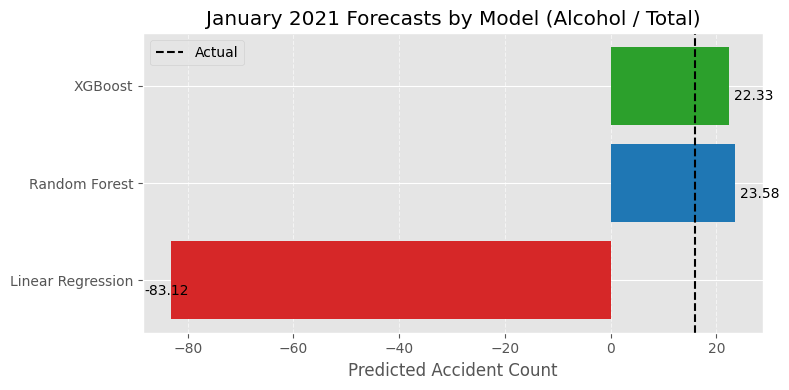

In [50]:
# January 2021 predictions
models = ['Linear Regression', 'Random Forest', 'XGBoost']
predictions = [-83.12, 23.58, 22.33]
actual = 16.0

# Plot
plt.figure(figsize=(8, 4))
bars = plt.barh(models, predictions, color=['#d62728', '#1f77b4', '#2ca02c'])
plt.axvline(actual, color='black', linestyle='--', label='Actual')

# Annotate each bar
for bar, pred in zip(bars, predictions):
    plt.text(bar.get_width() + (1 if pred >= 0 else -5), bar.get_y() + 0.25, f'{pred:.2f}', color='black')

plt.xlabel("Predicted Accident Count")
plt.title("January 2021 Forecasts by Model (Alcohol / Total)")
plt.legend()
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Import what we'll need

In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle

#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8, 4)


# Read Data

In [47]:
# get file directory 
current_directory = os.path.dirname(os.path.abspath('main.ipynb'))
file_path = os.path.join(current_directory, "data\monatszahlen2501_verkehrsunfaelle_27_02_25.csv") 

In [49]:
# read the existing subset of the data
raw_df =  pd.read_csv(file_path, encoding='utf-8')

# Translate Headers 
col_map = {
        'MONATSZAHL':                  'Category',
        'AUSPRAEGUNG':                  'Accident_type',
        'JAHR':                         'Year',
        'MONAT':                        'Month',
        'WERT':                         'Value',
        'VORJAHRESWERT':                'PreviousYearValue',
        'VERAEND_VORMONAT_PROZENT':     'ChangeFromPreviousMonth',
        'VERAEND_VORJAHRESMONAT_PROZENT':'ChangeFromSameMonthLastYear',
        'ZWOELF_MONATE_MITTELWERT':      'Year_Avg',
    }

df = raw_df.rename(columns=col_map)

# save backup
backup = df.copy()

In [50]:
df.head().T

,0,1,2,3,4
Category,Alkoholunfälle,Alkoholunfälle,Alkoholunfälle,Alkoholunfälle,Alkoholunfälle
Accident_type,insgesamt,insgesamt,insgesamt,insgesamt,insgesamt
Year,2024,2024,2024,2024,2024
Month,202401,202402,202403,202404,202405
Value,NaN,NaN,NaN,NaN,NaN
PreviousYearValue,NaN,NaN,NaN,NaN,NaN
ChangeFromPreviousMonth,NaN,NaN,NaN,NaN,NaN
ChangeFromSameMonthLastYear,NaN,NaN,NaN,NaN,NaN
Year_Avg,NaN,NaN,NaN,NaN,NaN


# data cleansing and pre-processing

In [51]:
import importlib
from tools import DataProcessor
importlib.reload(DataProcessor)

data_proc = DataProcessor.DataProcessor()

In [52]:
# get info 
data_proc.get_stats(df)

The number of the rows = 2254

 Dataframe information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Category                     2254 non-null   object 
 1   Accident_type                2254 non-null   object 
 2   Year                         2254 non-null   int64  
 3   Month                        2254 non-null   object 
 4   Value                        2086 non-null   float64
 5   PreviousYearValue            2086 non-null   float64
 6   ChangeFromPreviousMonth      1924 non-null   float64
 7   ChangeFromSameMonthLastYear  2001 non-null   float64
 8   Year_Avg                     1932 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 158.6+ KB
None

 Data summary statistics: 


,Year,Value,PreviousYearValue,ChangeFromPreviousMonth,ChangeFromSameMonthLastYear,Year_Avg
count,2254.000000,2086.000000,2086.000000,1924.000000,2001.000000,1932.000000
mean,2011.965839,1403.599712,1407.038830,5.321450,2.859020,775.825052
std,7.157922,4526.041109,4547.351874,40.627602,31.783479,1161.255368
min,2000.000000,0.000000,0.000000,-100.000000,-100.000000,12.000000
25%,2006.000000,41.000000,41.000000,-15.497500,-11.890000,40.000000
50%,2012.000000,394.000000,394.000000,0.000000,-0.650000,422.000000
75%,2018.000000,859.000000,859.750000,18.750000,11.110000,816.000000
max,2024.000000,46988.000000,46988.000000,600.000000,425.000000,3977.000000


In [7]:
# data pre-processing 
df = data_proc.processor(df)

In [8]:
# drop data from 2020 forward
df, df_removed = data_proc.drop_year(df) # default input: year=2020

In [9]:
# save df
data_proc.save_df(df) # default input: filename = "df_clean.pkl"

In [10]:
df = df.set_index('Month')
df.head().T

Month,2000-01,2000-02,2000-03,2000-04,2000-05
Category,Alcohol,Alcohol,Alcohol,Alcohol,Alcohol
Accident_type,Injuries and fatalities,Injuries and fatalities,Injuries and fatalities,Injuries and fatalities,Injuries and fatalities
Year,2000,2000,2000,2000,2000
Value,37.0,19.0,18.0,26.0,44.0
PreviousYearValue,NaN,NaN,NaN,NaN,NaN
ChangeFromPreviousMonth,NaN,-48.65,-5.26,44.44,69.23
ChangeFromSameMonthLastYear,NaN,NaN,NaN,NaN,NaN
Year_Avg,37.0,28.0,25.0,25.0,29.0
Total_Accidents_That_Year,NaN,NaN,NaN,NaN,NaN
month_num,1,2,3,4,5


In [11]:
x = df[df['Accident_type']=='Total']
x = x[x['Year']==2001]
x = x[x['month_num']==1]
x

,Category,Accident_type,Year,Value,PreviousYearValue,ChangeFromPreviousMonth,ChangeFromSameMonthLastYear,Year_Avg,Total_Accidents_That_Year,month_num,sin_month,cos_month,Season,lag_1,lag_2
Month,,,,,,,,,,,,,,,
2001-01,Alcohol,Total,2001,66.0,78.0,-22.35,-15.38,77.0,57957.0,1,0.5,0.866025,Winter,85.0,71.0
2001-01,Hit-and-run,Total,2001,871.0,835.0,-8.32,4.31,959.0,57957.0,1,0.5,0.866025,Winter,950.0,1017.0
2001-01,Traffic,Total,2001,3348.0,3448.0,-11.64,-2.90,3700.0,57957.0,1,0.5,0.866025,Winter,3789.0,3931.0


# Visualization

## Total Accidents Per Year

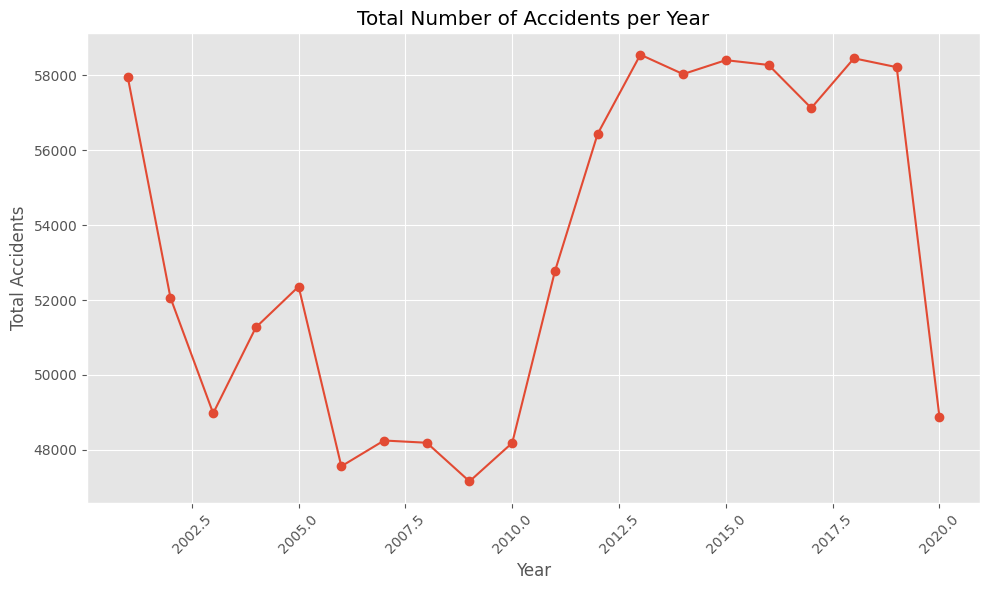

In [12]:
df_vis = df.reset_index()
yearly_totals = df_vis[['Year', 'Total_Accidents_That_Year']].drop_duplicates().sort_values('Year')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Total_Accidents_That_Year'], marker='o')
plt.title('Total Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Total Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Sharp drop after 2001

- Gradual rise from 2010 to ~2016

- Steep drop in 2020 >> likely due to COVID-19 lockdowns and mobility restrictions

*maybe add a Post_Covid flag?

## Monthly Accident Trends (all Categories)

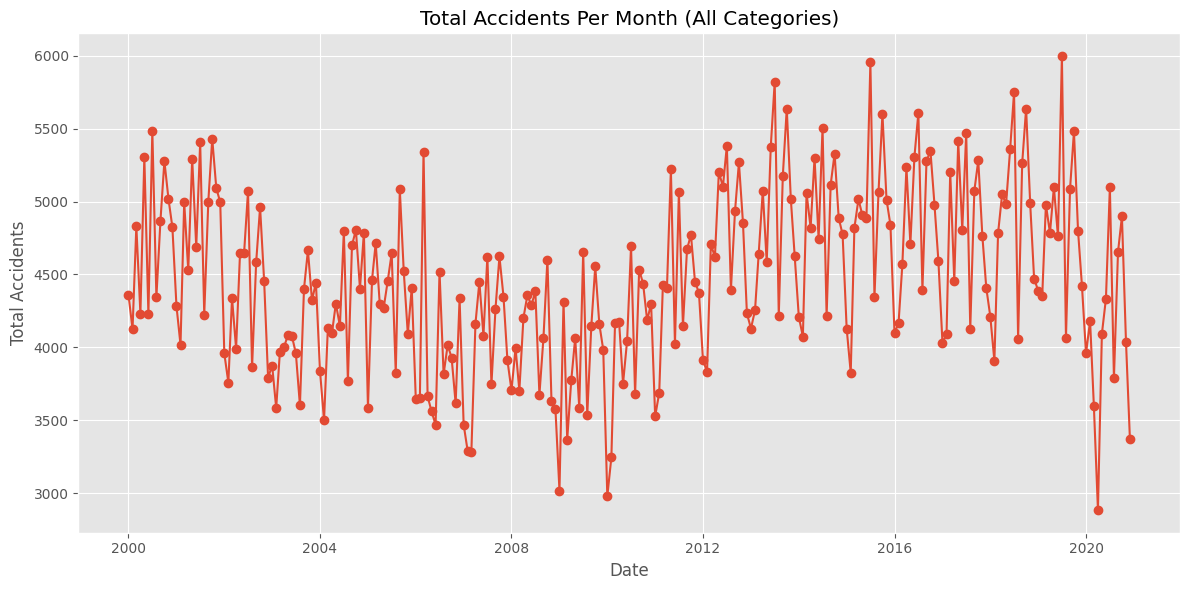

In [13]:
df_total = df.reset_index() 
df_total = df_total[df_total['Accident_type'] == 'Total'].copy()
monthly_totals = (
    df_total
    .groupby(['Year', 'month_num'], as_index=False)['Value']
    .sum()
    .rename(columns={'Value': 'Total_Accidents'})
)

monthly_totals['Date'] = pd.to_datetime(monthly_totals['Year'].astype(str) + '-' + monthly_totals['month_num'].astype(str).str.zfill(2))
monthly_totals = monthly_totals.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(monthly_totals['Date'], monthly_totals['Total_Accidents'], marker='o')
plt.title('Total Accidents Per Month (All Categories)')
plt.xlabel('Date')
plt.ylabel('Total Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly Accident Trends by Category

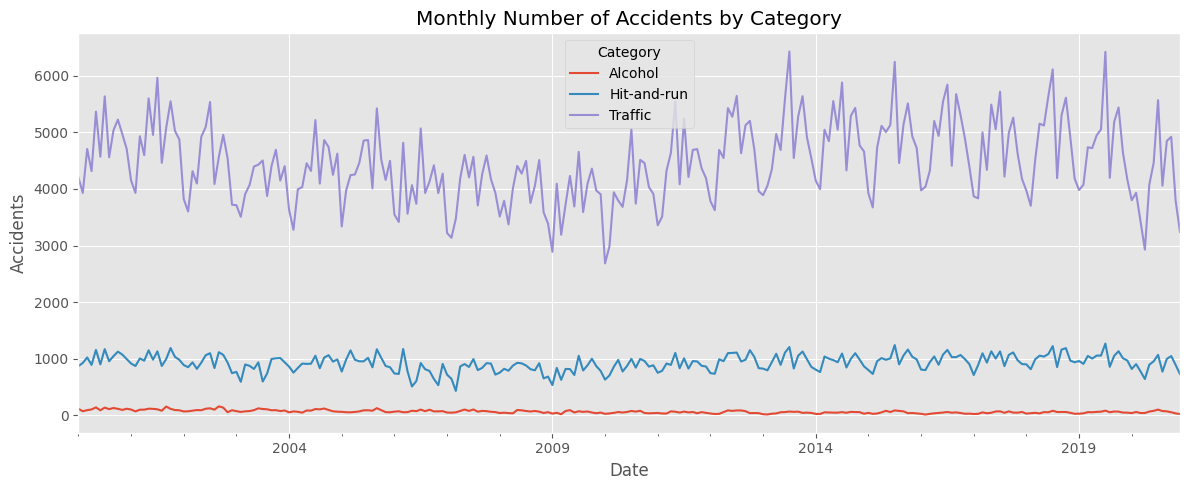

In [14]:
""" monthly time series  """
# pivot 
acc_by_cat = df.pivot_table(values='Value',
                            index=df.index,
                            columns='Category',
                            aggfunc='sum')
# plot
ax = acc_by_cat.plot(figsize=(12,5))
ax.set_title("Monthly Number of Accidents by Category")
ax.set_ylabel("Accidents")
ax.set_xlabel("Date")
plt.legend(title="Category")
plt.tight_layout()

In [15]:
# data to plot
df_ts = df.copy()
df_ts.index = df_ts.index.to_timestamp() 
df_vis = df_ts.reset_index() 

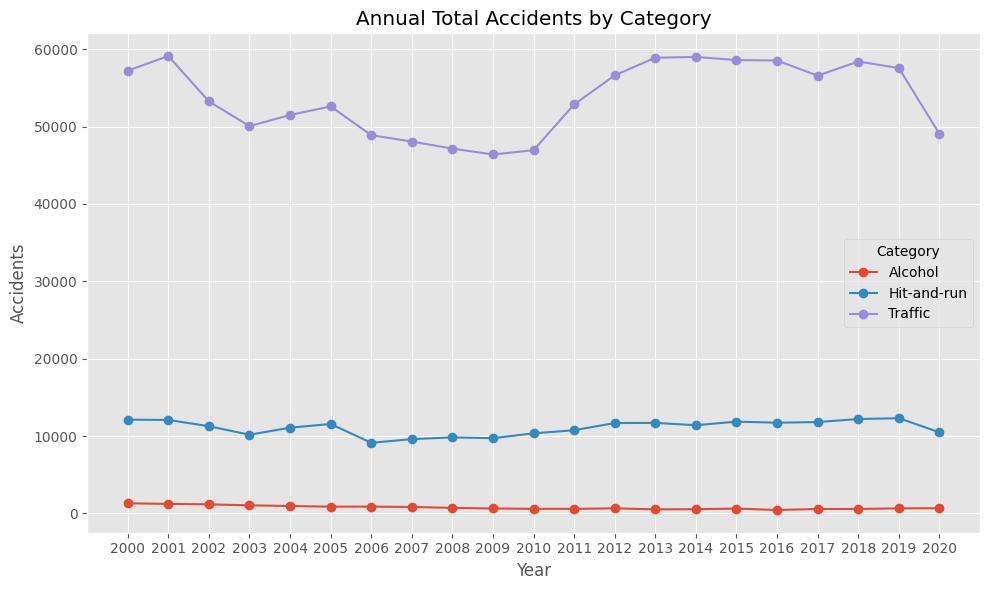

In [16]:
""" yearly totals""" 
yearly = (
    df_vis
    .groupby([df_vis['Month'].dt.year, 'Category'])['Value']
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10, 6))
for cat in yearly.columns:
    plt.plot(yearly.index, yearly[cat], marker='o', label=cat)

plt.title("Annual Total Accidents by Category")
plt.xlabel("Year")
plt.ylabel("Accidents")
plt.legend(title="Category")
plt.xticks(yearly.index)  # keep integer years
plt.tight_layout()

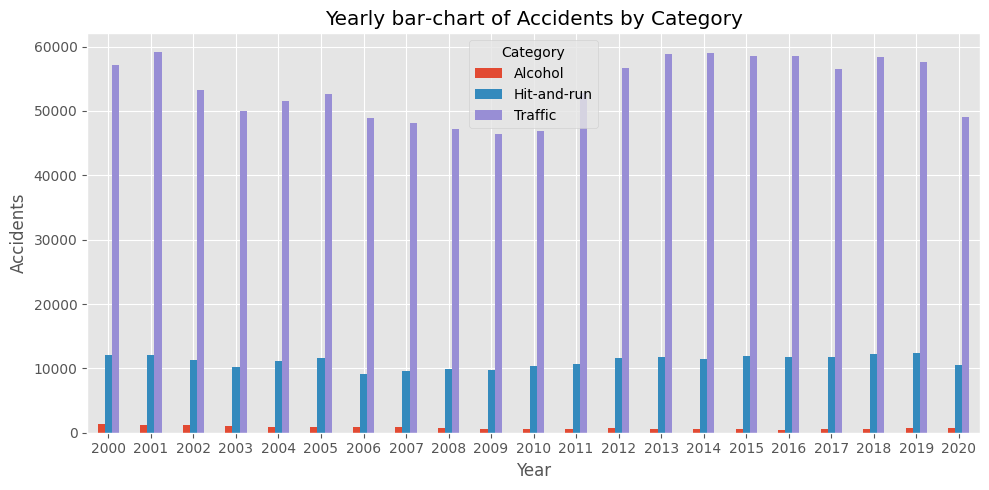

In [17]:
""" annual bars """
yearly = df_vis.reset_index().groupby([df_vis['Year'], 'Category'])['Value'].sum().unstack()

yearly.plot(kind='bar', figsize=(10,5))
plt.title("Yearly bar‐chart of Accidents by Category")
plt.ylabel("Accidents")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.tight_layout()

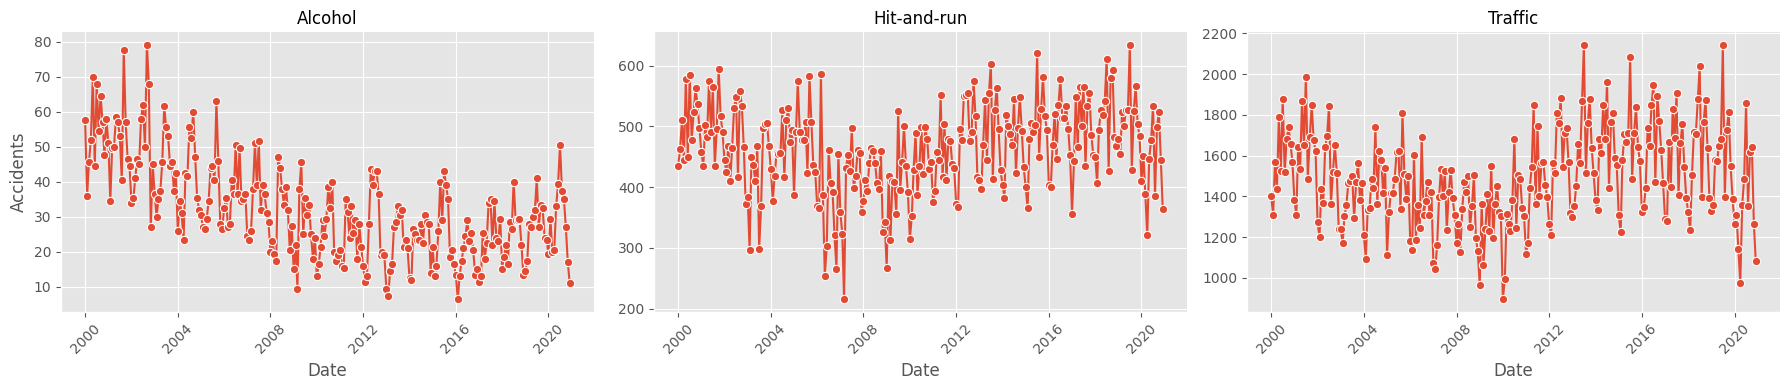

In [18]:
# clean up missing values 
long = df_vis.copy()
long['Value'] = long['Value'].replace([np.inf, -np.inf], np.nan)
long = long.dropna(subset=['Value'])

# xtract only the three columns we need
long = long[['Month','Category','Value']]

# FacetGrid
g = sns.FacetGrid(long, col="Category", col_wrap=3, height=4, aspect=1.5, sharey=False)
g.map_dataframe(sns.lineplot, x="Month", y="Value", marker="o", ci=None)
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
g.set_axis_labels("Date", "Accidents")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()

## Accident Values by Season

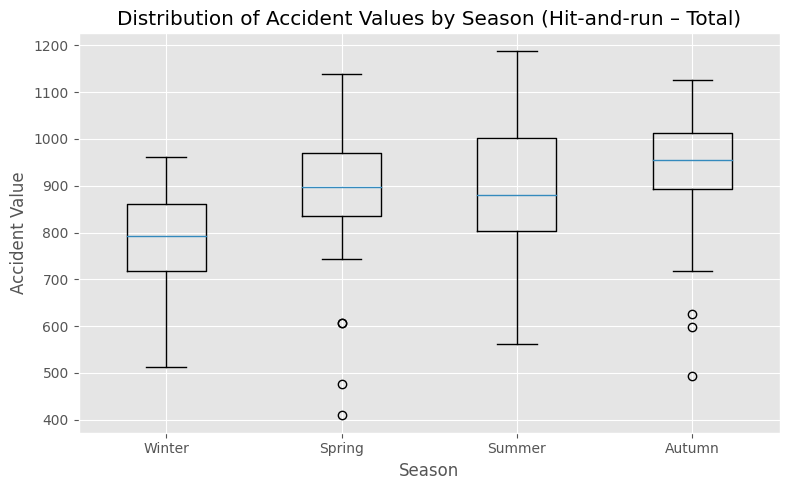

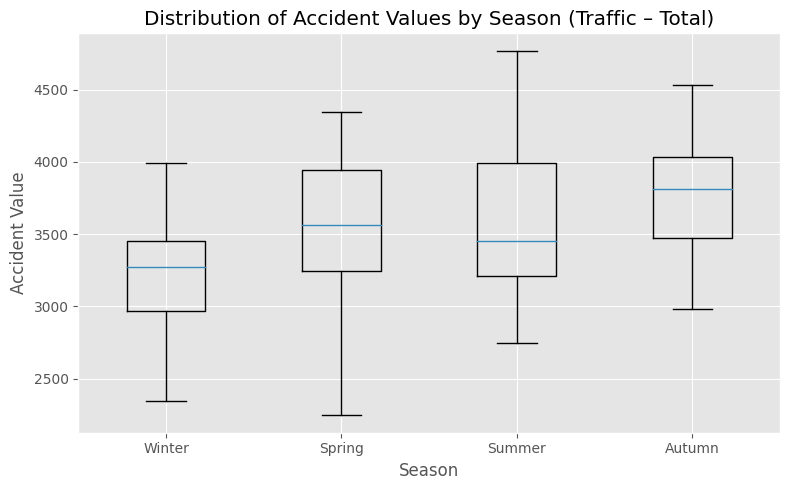

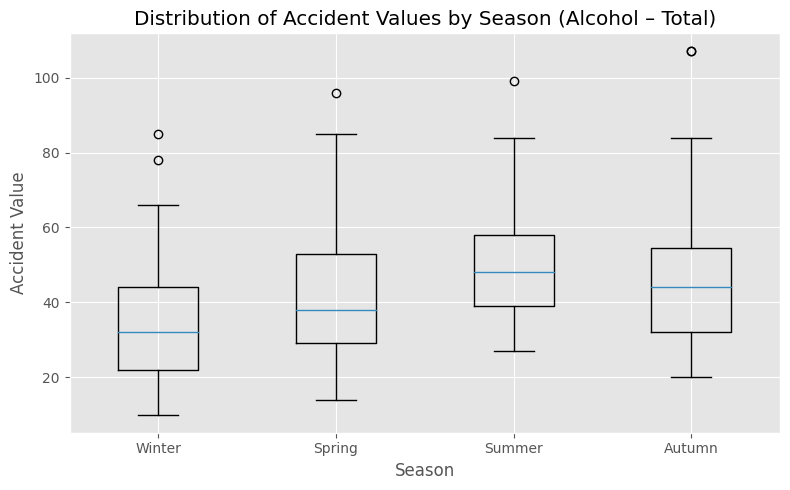

In [19]:
metric_trs = {"Alcohol", "Hit-and-run", "Traffic"}
accident_type_target = "Total"

# 1) Filter to Total & desired categories
df_total = df[
    (df['Accident_type'] == accident_type_target) &
    (df['Category'].isin(metric_trs))
]

# 2) Reset index >> 'Month' becomes a column
df_vis = df_total.reset_index()

# 3) Make sure Season is ordered
season_order = ["Winter", "Spring", "Summer", "Autumn"]
df_vis['Season'] = pd.Categorical(df_vis['Season'], 
                                  categories=season_order, 
                                  ordered=True)

# 4) Loop through each Category and plot separately
for cat in metric_trs:
    subset = df_vis[df_vis['Category'] == cat]
    
    data = [subset.loc[subset['Season'] == s, 'Value'] 
            for s in season_order]
    
    plt.figure(figsize=(8, 5))
    plt.boxplot(data, labels=season_order)
    plt.title(f'Distribution of Accident Values by Season ({cat} – Total)')
    plt.xlabel('Season')
    plt.ylabel('Accident Value')
    plt.tight_layout()
    plt.show()


Overall Take-Aways:

- median monthly alcohol crashes rise from ~30 in Winter → ~40 in Spring → ~50 in Summer, then dip slightly to ~45 in Autumn.
- median traffic incidents hit the year’s peak in Autumn
- hit-and-run counts are relatively stable, with just a gentle autumn uptick

# Linear Regression

In [20]:
import importlib
from models import BaselineLinearRegressor as rg
importlib.reload(rg)

<module 'models.BaselineLinearRegressor' from 'c:\\Users\\zhila\\OneDrive\\Desktop\\OneDrive\\Job Hunting\\Interview Prep Data\\Digital Product School of UnternehmerTUM\\git\\AI-Model\\models\\BaselineLinearRegressor.py'>

In [21]:
feature_cols=['Category', 'Accident_type', 'Year', 'Season', 
              'Total_Accidents_That_Year', 'lag_1', 'lag_2',
              'month_num', 'sin_month', 'cos_month', 'Year_Avg']
model = rg.BaselineLinearRegressor(df=df, 
                                    target_col='Value',
                                    feature_cols=feature_cols
                                    )

In [22]:
model.train()

In [23]:
metrics = model.evaluate()
print(metrics)

{'MSE': 25007.099140800645, 'R^2 Score': 0.9826246274060305}


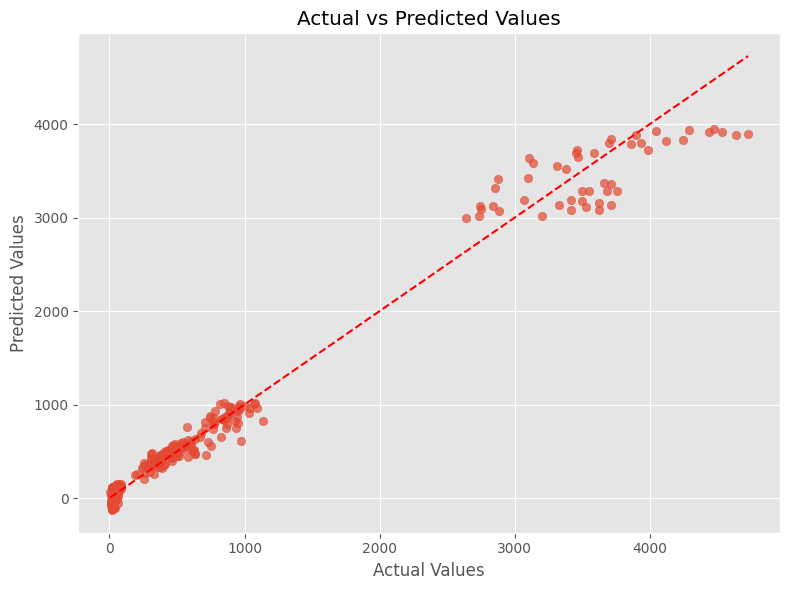

In [24]:
def plot_predictions(model_obj):
    y_pred = model_obj.model.predict(model_obj.X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(model_obj.y_test, y_pred, alpha=0.7)
    plt.plot([model_obj.y_test.min(), model_obj.y_test.max()],
             [model_obj.y_test.min(), model_obj.y_test.max()],
             color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions(model)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

def cross_validate_model(model_obj, cv=5):
    # R^2 scores
    r2_scores = cross_val_score(model_obj.model, model_obj.X, model_obj.y, cv=cv, scoring='r2')
    print(f"R^2 Cross-Validation Scores (cv={cv}):", r2_scores)
    print(f"Average R^2: {np.mean(r2_scores):.4f}")
    
    # MSE scores 
    neg_mse_scores = cross_val_score(
        model_obj.model,
        model_obj.X,
        model_obj.y,
        cv=cv,
        scoring=make_scorer(mean_squared_error, greater_is_better=False)
    )
    mse_scores = -neg_mse_scores
    print(f"MSE Cross-Validation Scores (cv={cv}):", mse_scores)
    print(f"Average MSE: {np.mean(mse_scores):.2f}")

cross_validate_model(model)

R^2 Cross-Validation Scores (cv=5): [-16.50275452 -29.34513889   0.91113992   0.97515098   0.97806238]
Average R^2: -8.5967
MSE Cross-Validation Scores (cv=5): [ 6925.46474768  6412.07896065  9059.43466006 51923.5487886
 52356.19098795]
Average MSE: 25335.34


In [26]:
target_row = df_removed[
    (df_removed['Month'] == '2021-01') &
    (df_removed['Accident_type'] == 'Total') &
    (df_removed['Category'] == 'Alcohol')
].copy()

target_row

,Category,Accident_type,Year,Month,Value,PreviousYearValue,ChangeFromPreviousMonth,ChangeFromSameMonthLastYear,Year_Avg,Total_Accidents_That_Year,month_num,sin_month,cos_month,Season,lag_1,lag_2
528,Alcohol,Total,2021,2021-01,16.0,28.0,23.08,-42.86,35.0,48230.0,1,0.5,0.866025,Winter,13.0,23.0


In [27]:
train_df = df[
    (df['Accident_type'] == 'Total') &
    (df['Category'] == 'Alcohol')
].copy()

feature_cols = [col for col in df.columns if col != 'Value']

In [28]:
X_jan = target_row[feature_cols]
y_true = target_row['Value'].values[0]
y_pred = model.predict(X_jan)[0]

print(f"Predicted Value for Jan 2021: {y_pred:.2f}")
print(f"Actual Value from df_removed: {y_true}")
print(f"Absolute Error: {abs(y_pred - y_true):.2f}")

Predicted Value for Jan 2021: -126.53
Actual Value from df_removed: 16.0
Absolute Error: 142.53


# Random Forest Regressor

In [29]:
import importlib
from models import BaselineRandomForestRegressor as rf
importlib.reload(rf)

<module 'models.BaselineRandomForestRegressor' from 'c:\\Users\\zhila\\OneDrive\\Desktop\\OneDrive\\Job Hunting\\Interview Prep Data\\Digital Product School of UnternehmerTUM\\git\\AI-Model\\models\\BaselineRandomForestRegressor.py'>

In [30]:
rf_model = rf.BaselineRandomForestRegressor(
    df=train_df,
    target_col='Value',
    feature_cols=['ChangeFromPreviousMonth', 'Year_Avg', 'sin_month', 'cos_month', 'lag_1', 'lag_2', 'Season']
)

In [31]:
rf_model.train()

In [32]:
X_jan = target_row[rf_model.feature_cols]
y_pred = rf_model.predict(X_jan)[0]
y_true = target_row['Value'].values[0]

print(f"RF Prediction: {y_pred:.2f}, Actual: {y_true}, Error: {abs(y_pred - y_true):.2f}")


RF Prediction: 23.58, Actual: 16.0, Error: 7.58


### predictions vs actuals for all of 2021

In [33]:
train_df = df[
    (df['Accident_type'] == 'Total') &
    (df['Category'] == 'Alcohol')
].copy()

predict_df = df_removed[
    (df_removed['Accident_type'] == 'Total') &
    (df_removed['Category'] == 'Alcohol') &
    (df_removed['Year'] == 2021)
].copy()

rf_model = rf.BaselineRandomForestRegressor(
    df=train_df,
    target_col='Value',
    feature_cols=['ChangeFromPreviousMonth', 'Year_Avg', 'sin_month', 'cos_month', 'lag_1', 'lag_2', 'Season']
)
rf_model.train()

In [34]:
X_2021 = predict_df[rf_model.feature_cols]
y_true = predict_df['Value'].values
y_pred = rf_model.predict(X_2021)

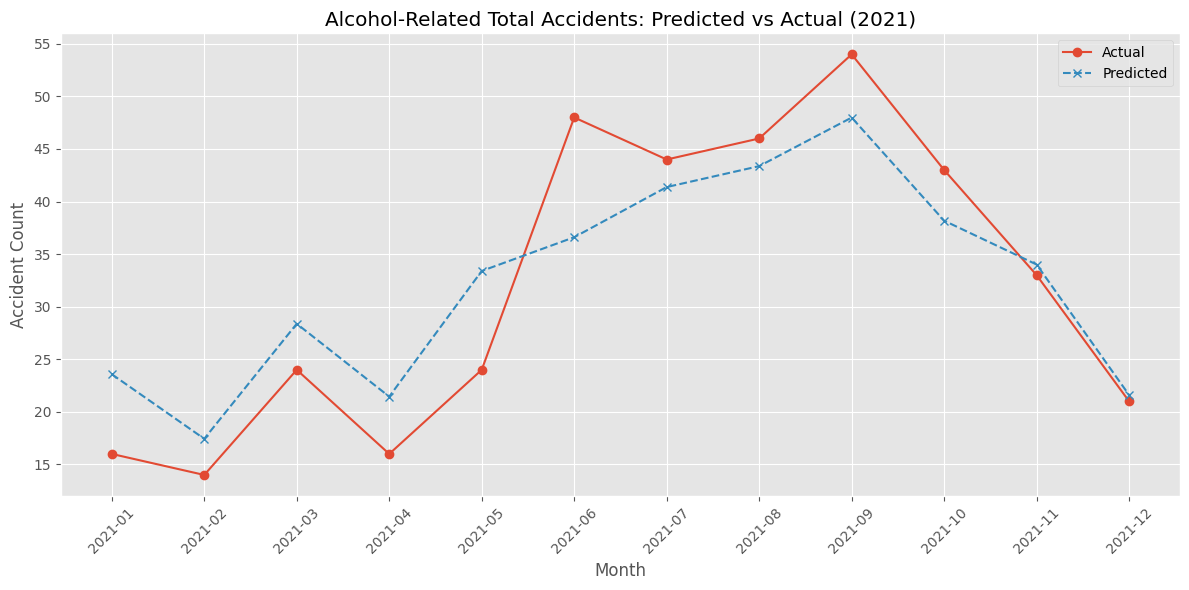

In [35]:
df_vis = predict_df.reset_index()
months = df_vis['Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(months, y_true, marker='o', label='Actual')
plt.plot(months, y_pred, marker='x', linestyle='--', label='Predicted')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Alcohol-Related Total Accidents: Predicted vs Actual (2021)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")
print(f"MAE as % of mean: {100 * mae / np.mean(y_true):.2f}%")

MAE: 4.94
RMSE: 5.85
R²: 0.820
MAE as % of mean: 15.49%


- On average, the model is off by ~5 accidents/month
- 82% of the variance in actual values is explained

# XGBoost 

In [37]:
import importlib
from models import BaselineXGBoostRegressor as xgb
importlib.reload(xgb)

<module 'models.BaselineXGBoostRegressor' from 'c:\\Users\\zhila\\OneDrive\\Desktop\\OneDrive\\Job Hunting\\Interview Prep Data\\Digital Product School of UnternehmerTUM\\git\\AI-Model\\models\\BaselineXGBoostRegressor.py'>

In [38]:
xgb_model = xgb.BaselineXGBoostRegressor(
    df=train_df,
    target_col='Value',
    feature_cols=['ChangeFromPreviousMonth', 'Year_Avg', 'sin_month', 'cos_month', 'lag_1', 'lag_2', 'Season']
)


In [39]:
xgb_model.train()

In [40]:
xgb_model.evaluate()

{'MSE': 23.28125305220958, 'R^2 Score': 0.9513646555135692}

In [41]:
jan_2021 = df_removed[
    (df_removed['Category'] == 'Alcohol') &
    (df_removed['Accident_type'] == 'Total') &
    (df_removed['Month'] == '2021-01')
].copy()

X_jan = jan_2021[xgb_model.feature_cols]
y_true_jan = jan_2021['Value'].values[0]
y_pred_jan = xgb_model.predict(X_jan)[0]
error_jan = abs(y_pred_jan - y_true_jan)

print(f"XGBoost Jan 2021 Prediction: {y_pred_jan:.2f}")
print(f"Actual: {y_true_jan}")
print(f"Absolute Error: {error_jan:.2f}")

XGBoost Jan 2021 Prediction: 22.33
Actual: 16.0
Absolute Error: 6.33


In [42]:
train_df = df[
    (df['Category'] == 'Alcohol') &
    (df['Accident_type'] == 'Total') &
    (df['Year'] < 2021)
].copy()

predict_df = df_removed[
    (df_removed['Category'] == 'Alcohol') &
    (df_removed['Accident_type'] == 'Total') &
    (df_removed['Year'] == 2021)
].copy()

In [43]:
X_2021 = predict_df[xgb_model.feature_cols]
y_true = predict_df['Value'].values
y_pred = xgb_model.predict(X_2021)

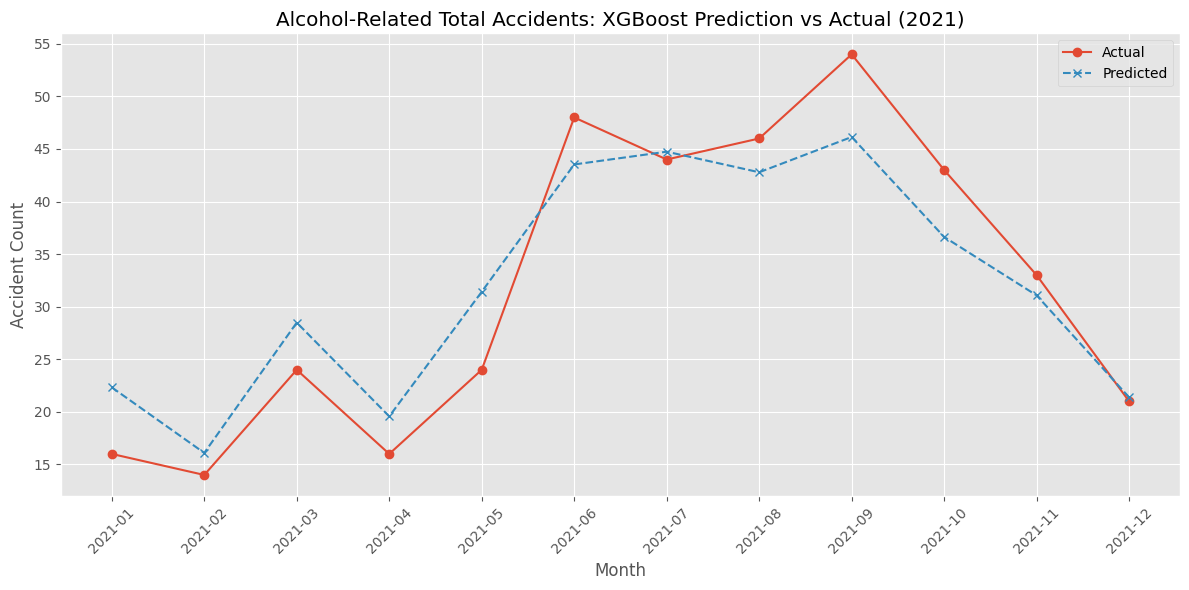

In [44]:
df_vis = predict_df.reset_index()
months = df_vis['Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(months, y_true, marker='o', label='Actual')
plt.plot(months, y_pred, marker='x', linestyle='--', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.title('Alcohol-Related Total Accidents: XGBoost Prediction vs Actual (2021)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Save pipeline

In [ ]:
# Saving/serializing pipeline
    # rf_model
    # xgb_model 
with open("pipeline.pkl", "wb") as f:
    pickle.dump(xgb_model.get_model(), f)

### Deployment on Heroku

(in the terminal)
verify connection:
> heroku git:remote -a forecast11

> git remote -v 

Then:
>git add .

>git commit -m "Re-deploy model to forecast11"

>git push heroku main

See the exact web address:
>heroku apps:info -a forecast11